### Offshore converter (Energyhub) capacities

In [1]:
import os
import sys

parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import matplotlib.pyplot as plt
import pandas as pd
from constants import HUB_TO_COLOR
from cycler import cycler

CASES = ["Base", "NOgrid", "NoHubs", "NoHubsNOgrid"]#, "OnlyCentral", "OnlyEU", "OnlyNorth"]

DF_BY_CASES = dict({})

for case in CASES:
    _df = pd.read_csv(f'../Results/{case}/results_output_offshoreConverter.csv')
    DF_BY_CASES[case] = _df

DF_BY_CASES

{'Base':                 Node     Period  Converter invested capacity [MW]  \
 0        EnergyhubEU  2020-2025                      7.558907e-03   
 1        EnergyhubEU  2025-2030                      1.269076e-03   
 2        EnergyhubEU  2030-2035                      3.338493e+04   
 3        EnergyhubEU  2035-2040                      1.541175e+04   
 4        EnergyhubEU  2040-2045                      1.591043e+04   
 5        EnergyhubEU  2045-2050                      2.555244e-06   
 6        EnergyhubEU  2050-2055                      3.917800e-07   
 7        EnergyhubEU  2055-2060                      3.780343e-07   
 8     EnergyhubNorth  2020-2025                      6.953724e-03   
 9     EnergyhubNorth  2025-2030                      7.124237e-04   
 10    EnergyhubNorth  2030-2035                      2.247237e-02   
 11    EnergyhubNorth  2035-2040                      5.887771e+02   
 12    EnergyhubNorth  2040-2045                      5.789608e+04   
 13    Energ

Map converter to fixed color

In [2]:
def plot_offshore_converter_cap(case, _df):
    print(f"Offshore converter capacity for case: {case}")

    df = _df[["Node", "Period", "Converter total capacity [MW]"]]

    prod_converter_2050 = df[df["Period"] == "2045-2050"]["Converter total capacity [MW]"].sum()
    print(f"Offshore converter total capacity 2050 for case {case}: {round(prod_converter_2050/1000, 2)} GW\n")

    # Skip plots that have no capacity (1 MW since some threshold)
    if prod_converter_2050 < 1: 
        return

    periods = list(df["Period"].unique())
    nodes_sorted_by_cap = list(df[df["Period"] == "2055-2060"]\
                              .sort_values(by="Converter total capacity [MW]", ascending=False)["Node"].values)

    nodes_displayed = nodes_sorted_by_cap
    
    installed_caps = []
    for node in nodes_displayed:
        cap_by_period = []
        for period in periods:
            cap_by_period.append(df[(df["Node"] == node) & (df["Period"] == period)]["Converter total capacity [MW]"].values[0])

        # Remove nodes that have no capacity (1 MW since some threshold)
        if all(c < 1 for c in cap_by_period):
            nodes_displayed.remove(node)
            continue
        else:
            installed_caps.append(cap_by_period)
    
    installed_caps_GW = [[cap/1000 for cap in sublist] for sublist in installed_caps]
    period_displayed = [period.split("-")[1] for period in periods]

    plt.rcParams.update({'font.size': 14})
    default_cycler = cycler(color=[HUB_TO_COLOR[node] for node in nodes_displayed])
    plt.figure(figsize=(10,6))
    plt.rc('axes', axisbelow=True, prop_cycle=default_cycler)
    plt.grid(lw=0.3)
    plt.stackplot(period_displayed, installed_caps_GW, labels=nodes_displayed, edgecolor="white", lw=0.7)
    plt.ylabel('Offshore converter capacity [GW]')
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=5, fontsize=10)
    plt.margins(x=0)

    y_max = 220
    plt.ylim(0, y_max)
    
    # Plot capacity 2050 
    cap_2050 = sum([cap[5] for cap in installed_caps_GW]) # Total trans cap in GW

    # Align text based on height of peak
    # prod_by_periods = [sum([gen_cap[i] for gen_cap in installed_caps_gen_TW]) for i in range(8)]
    # max_prod = max(prod_by_periods)

    plt.axvline(x = 5, color = 'black', ls="--")
    plt.text(x=2.5, y=y_max*0.95, s=f"Capacity in 2050: {round(cap_2050, 1)} GW", verticalalignment='top', fontsize=14)

    plt.show()

Offshore converter capacity for case: Base
Offshore converter total capacity 2050 for case Base: 187.48 GW



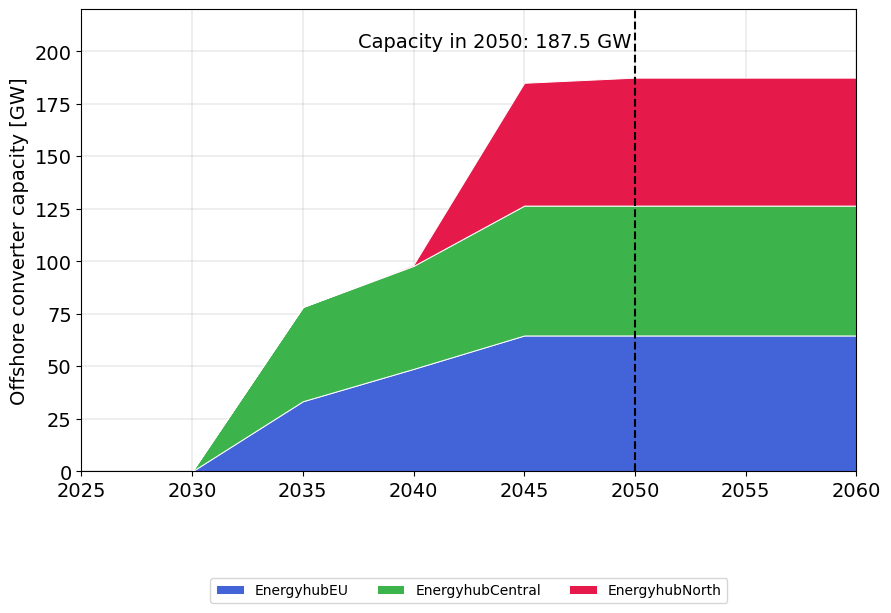

Offshore converter capacity for case: NOgrid
Offshore converter total capacity 2050 for case NOgrid: 155.85 GW



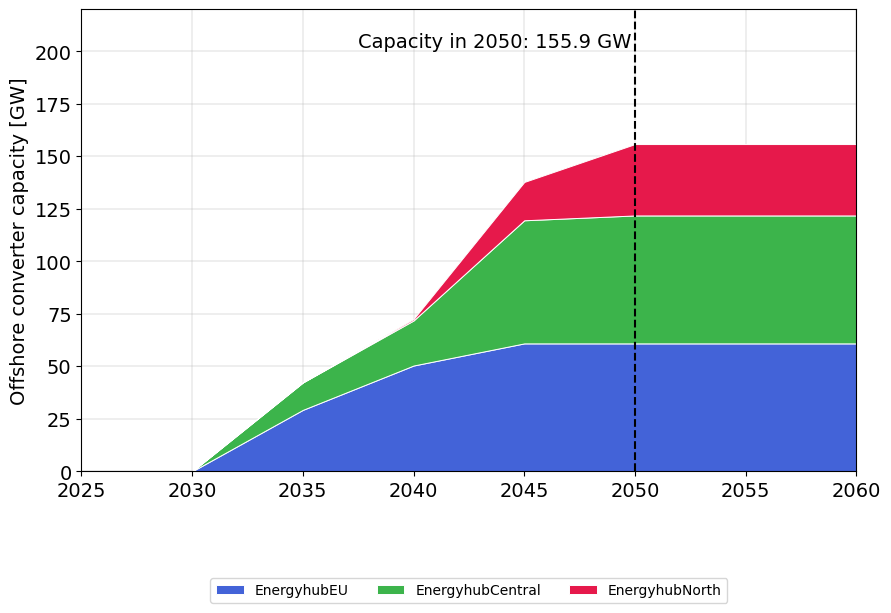

Offshore converter capacity for case: NoHubs
Offshore converter total capacity 2050 for case NoHubs: 0.0 GW

Offshore converter capacity for case: NoHubsNOgrid
Offshore converter total capacity 2050 for case NoHubsNOgrid: 0.0 GW



In [3]:
for case, _df in DF_BY_CASES.items():
    plot_offshore_converter_cap(case, _df)

Calculate Hub capacity for case in given period

In [9]:
FILTER_CASE = "Base"
FILTER_PERIOD = "2045-2050"

filtered_df = DF_BY_CASES[FILTER_CASE]
filtered_df = filtered_df[filtered_df["Period"] == FILTER_PERIOD].drop(columns=["Converter invested capacity [MW]"])
filtered_df["Percent of total capacity"] = round(filtered_df["Converter total capacity [MW]"] \
    / filtered_df["Converter total capacity [MW]"].sum() * 100, 1)
filtered_df

,Node,Period,Converter total capacity [MW],Percent of total capacity
5,EnergyhubEU,2045-2050,65464.292206,34.7
13,EnergyhubNorth,2045-2050,60927.843426,32.3
21,EnergyhubCentral,2045-2050,62245.606205,33.0
